## Machine learning


*   Lab 02 - 12.10.2018
*   Lab 03



In [0]:
import numpy as np 

### Sample file

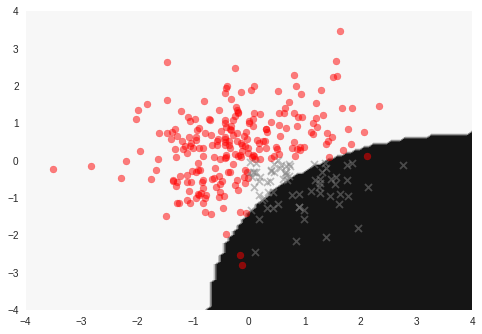

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math

def sigma(x):
    return 1 / (1 + math.exp( -x ))

def getFakeNeuralNetOutput(x, y):
    firstLayerNeuron1 = sigma(x + 0.01 * y)
    firstLayerNeuron2 = sigma(0.01 * x + y)
    outputLayer1 = sigma( firstLayerNeuron1 -  firstLayerNeuron2 + 0.3)
    outputLayer2 = sigma(-  firstLayerNeuron1 + firstLayerNeuron2 - 0.3)
    return [outputLayer1, outputLayer2]

def getDecisionOfFakeNeuralNet(x, y):
    output = getFakeNeuralNetOutput(x, y)
    return 1 if output[1] > output[0] else 0

def getSamples(N):
    samples = []
    for i in range(N):
        x = np.random.normal()
        y = np.random.normal()
        which = 1 if x > 0 and y < 0 else 0
        samples.append( (x, y, which) )
    return samples

def plotDecisionDomain(listOfX, listOfY, decisionFunction):
    arrayOfX, arrayOfY = np.meshgrid(listOfX, listOfY)
    plt.contourf(arrayOfX, arrayOfY, [[decisionFunction(x, y) for y in listOfY] for x in listOfX])

def plotSamples(samples):
    markers = ['o', 'x']
    colors = ['red', 'gray']
    for sample in samples:
        plt.scatter(sample[0], sample[1],
                    marker = markers[sample[2]], color = colors[sample[2]],
                    alpha = 0.5)

def getGrid(view):
    return [view[0] + (view[1] - view[0]) * i / (view[2] - 1) for i in range(view[2])]

numberOfSamples = 300
samples = getSamples(numberOfSamples)

viewX = [-4, 4, 101]
viewY = [-4, 4, 101]

plotDecisionDomain(getGrid(viewX), getGrid(viewY), getDecisionOfFakeNeuralNet)
plotSamples(samples)
plt.show()


#### Testing np dot

In [0]:
w = np.random.randint(10, size=(2,5))

In [0]:
w

array([[6, 0, 9, 9, 9],
       [5, 1, 5, 1, 9]])

In [0]:
X=[1,2,3,4,5]

In [0]:
np.dot(w,X)

array([114,  71])

In [0]:
np.sum(w*X, axis=1)

array([114,  71])

### Basic Neural Network model

In [0]:
def initialize_weights(layer_dims):
  parameters = {}
  L = len(layer_dims)            # number of layers in the network
  for l in range(1, L):
    parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.01
  return parameters


def sigmoid(x):
  return 1 / (1 + np.exp(-x))  

  
def NN_model_forward(X, parameters):
  cache = {}
  A = X.copy()
  A.append(-1)                       # add bias 
  L = len(parameters)                # number of layers in the neural network  
  for l in range(1, L+1):
    cache['A' + str(l)] = A
    W = parameters['W' + str(l)] 
    Z = np.dot(W, A)# current layer weights
    A = sigmoid(Z)
    cache['Z' + str(l)] = A
    
  return A, Z


def cost_function(output,target):
  return 1/len(target)*np.sum((output-target)**2)


def update_parametes(L, lerning_rate):
  parameters = {}
  for l in range(1, L+1):
    parameters['W' + str(l)] = parameters['W' + str(l)] - learning_rate * gradients['dW' + str(l)]
  return parameters


def backward_propagation(L,cache):
  gradients = {}
  for l in reversed(range(L)):
    dZ = sigmoid(x)(1-sigmoid(x))
    gradients['dW'+str(l)] = 
  
  return gradients


In [0]:
X = [0.2, 0.4, 0.8, 0.1]
Y = [1,0]

layers_dims = [len(X)+1, 2, 2] # layer_dims = [input, hidden_layers, output]
weights = initialize_weights(layers_dims)
output = NN_model_forward(X, weights)

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

## Mnist dataset

In [0]:
!pip install mnist

In [0]:
import mnist
import scipy.misc

train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


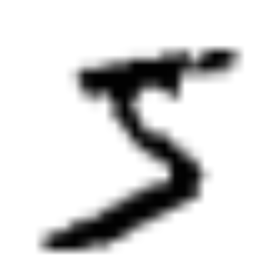

In [15]:
scipy.misc.toimage(scipy.misc.imresize(train_images[0,:,:] * -1 + 256, 10.))

In [16]:
train_images.shape

(60000, 28, 28)

In [0]:
x = train_images.reshape((train_images.shape[0], train_images.shape[1] * train_images.shape[2]))

In [19]:
train_images.shape

(60000, 28, 28)